# Hodgkin Huxley Model


These are the codes for the report 


## 1 . 0  A Hodgkin Huxley model for neuron membrane voltage

With this the language used was _`python`_

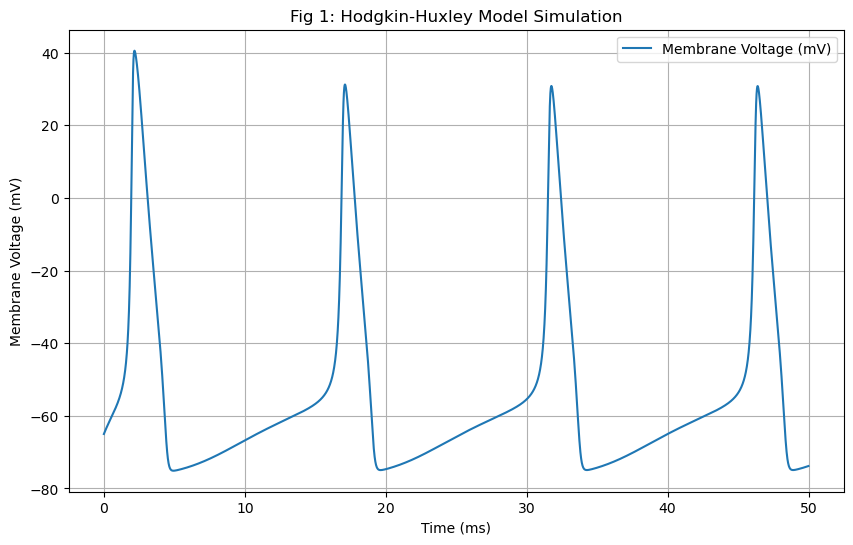

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Hodgkin-Huxley model parameters
Cm = 1.0   # membrane capacitance (uF/cm^2)
g_Na = 120.0  # sodium conductance (mS/cm^2)
g_K = 36.0    # potassium conductance (mS/cm^2)
g_L = 0.3     # leak conductance (mS/cm^2)
E_Na = 50.0   # sodium reversal potential (mV)
E_K = -77.0   # potassium reversal potential (mV)
E_L = -54.387  # leak reversal potential (mV)

# Initial conditions
V_0 = -65.0  # initial membrane voltage (mV)
m_0 = 0.05   # initial sodium activation gating variable
h_0 = 0.6    # initial sodium inactivation gating variable
n_0 = 0.32   # initial potassium activation gating variable

# Simulation parameters
dt = 0.01    # time step (ms)
t_max = 50.0  # simulation time (ms)

# Function to simulate the Hodgkin-Huxley model

def hodgkin_huxley(V, m, h, n, I):
    alpha_m = 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))
    beta_m = 4.0 * np.exp(-(V + 65.0) / 18.0)

    alpha_h = 0.07 * np.exp(-(V + 65.0) / 20.0)
    beta_h = 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    alpha_n = 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))
    beta_n = 0.125 * np.exp(-(V + 65.0) / 80.0)

    dV = (I - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L)) / Cm
    dm = alpha_m * (1.0 - m) - beta_m * m
    dh = alpha_h * (1.0 - h) - beta_h * h
    dn = alpha_n * (1.0 - n) - beta_n * n

    return dV, dm, dh, dn

# Initializing arrays to store simulation results
time_points = np.arange(0, t_max, dt)
voltage_trace = np.zeros_like(time_points)
m_trace = np.zeros_like(time_points)
h_trace = np.zeros_like(time_points)
n_trace = np.zeros_like(time_points)

# initial conditions
voltage_trace[0] = V_0
m_trace[0] = m_0
h_trace[0] = h_0
n_trace[0] = n_0

# Simulate the Hodgkin-Huxley model
for i in range(1, len(time_points)):
    I_input = 10.0  # Constant input current for excitation
    dV, dm, dh, dn = hodgkin_huxley(voltage_trace[i-1], m_trace[i-1], h_trace[i-1], n_trace[i-1], I_input)
    voltage_trace[i] = voltage_trace[i-1] + dt * dV
    m_trace[i] = m_trace[i-1] + dt * dm
    h_trace[i] = h_trace[i-1] + dt * dh
    n_trace[i] = n_trace[i-1] + dt * dn

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, voltage_trace, label='Membrane Voltage (mV)')
plt.title('Fig 1: Hodgkin-Huxley Model Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()


## 2.0 Calibrated the model.


The model is calibrated to have a `resting membrane potential` of `-60mV` and `a maximum
depolarised membrane potential` of `10mV`

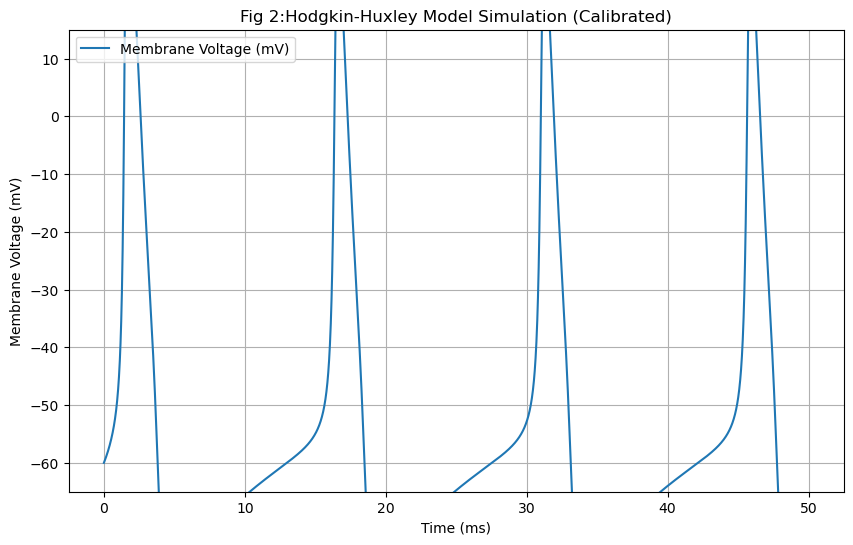

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Hodgkin-Huxley model parameters
Cm = 1.0   # membrane capacitance (uF/cm^2)
g_Na = 120.0  # sodium conductance (mS/cm^2)
g_K = 36.0    # potassium conductance (mS/cm^2)
g_L = 0.3     # leak conductance (mS/cm^2)
E_Na = 50.0   # sodium reversal potential (mV)
E_K = -77.0   # potassium reversal potential (mV)
E_L = -54.387  # leak reversal potential (mV)

# Calibrated resting and maximum depolarized membrane potentials
V_rest = -60.0  # calibrated resting membrane potential (mV)
V_max = 10.0    # calibrated maximum depolarized membrane potential (mV)

# Initial conditions with calibration
V_0 = V_rest   # initial membrane voltage (mV)
m_0 = 0.05     # initial sodium activation gating variable
h_0 = 0.6      # initial sodium inactivation gating variable
n_0 = 0.32     # initial potassium activation gating variable

# Simulation parameters
dt = 0.01    # time step (ms)
t_max = 50.0  # simulation time (ms)

# Function to simulate the Hodgkin-Huxley model
def hodgkin_huxley(V, m, h, n, I):
    alpha_m = 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))
    beta_m = 4.0 * np.exp(-(V + 65.0) / 18.0)

    alpha_h = 0.07 * np.exp(-(V + 65.0) / 20.0)
    beta_h = 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    alpha_n = 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))
    beta_n = 0.125 * np.exp(-(V + 65.0) / 80.0)

    dV = (I - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L)) / Cm
    dm = alpha_m * (1.0 - m) - beta_m * m
    dh = alpha_h * (1.0 - h) - beta_h * h
    dn = alpha_n * (1.0 - n) - beta_n * n

    return dV, dm, dh, dn

# Initializing arrays to store simulation results
time_points = np.arange(0, t_max, dt)
voltage_trace = np.zeros_like(time_points)
m_trace = np.zeros_like(time_points)
h_trace = np.zeros_like(time_points)
n_trace = np.zeros_like(time_points)

# initial conditions
voltage_trace[0] = V_0
m_trace[0] = m_0
h_trace[0] = h_0
n_trace[0] = n_0

# Simulate the Hodgkin-Huxley model
for i in range(1, len(time_points)):
    I_input = 10.0  # Constant input current for excitation (you can modify this for different inputs)
    dV, dm, dh, dn = hodgkin_huxley(voltage_trace[i-1], m_trace[i-1], h_trace[i-1], n_trace[i-1], I_input)
    voltage_trace[i] = voltage_trace[i-1] + dt * dV
    m_trace[i] = m_trace[i-1] + dt * dm
    h_trace[i] = h_trace[i-1] + dt * dh
    n_trace[i] = n_trace[i-1] + dt * dn

# Adjust the membrane voltage to the calibrated range
voltage_trace = voltage_trace - V_rest
voltage_trace = (voltage_trace / (V_max - V_rest)) * (V_max - V_rest) + V_rest

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, voltage_trace, label='Membrane Voltage (mV)')
plt.title('Fig 2:Hodgkin-Huxley Model Simulation (Calibrated)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.ylim(V_rest - 5, V_max + 5)  # y-axis limits for better visualization
plt.legend()
plt.grid(True)
plt.show()

## 3.0 Automatic method of Recalibration

The depolarised membrane potential is 20mV and the spiking period is 30ms. 


The two parameters are: 

1. g_Na

2. E_L



Optimized Parameters:
g_Na: 64.94258491183442
E_L: -67.83467559866347


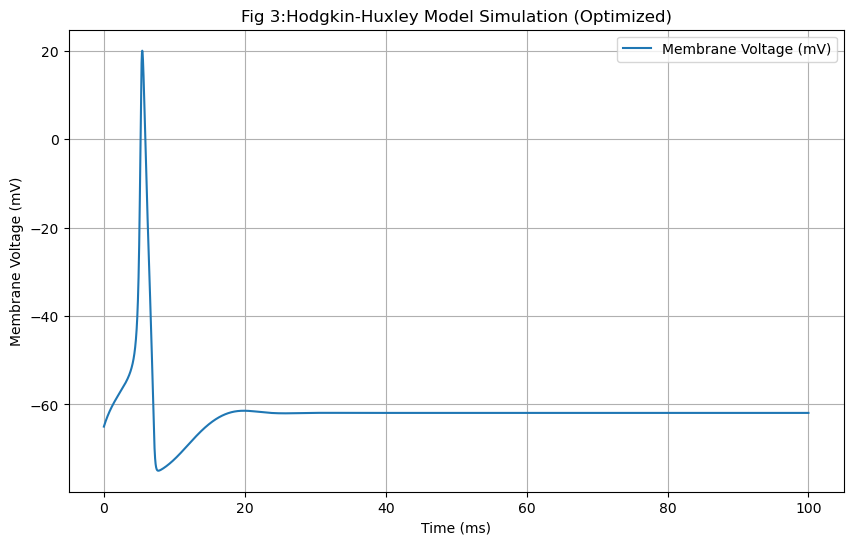

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Hodgkin-Huxley model parameters
Cm = 1.0   # membrane capacitance (uF/cm^2)
g_K = 36.0    # potassium conductance (mS/cm^2)
E_K = -77.0   # potassium reversal potential (mV)

# Target values for recalibration
target_depolarized_voltage = 20.0  # mV
target_spiking_period = 30.0  # ms

# Function to simulate the Hodgkin-Huxley model with specified parameters
def hodgkin_huxley(params, V, m, h, n, I):
    g_Na, E_L = params

    alpha_m = 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))
    beta_m = 4.0 * np.exp(-(V + 65.0) / 18.0)

    alpha_h = 0.07 * np.exp(-(V + 65.0) / 20.0)
    beta_h = 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    alpha_n = 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))
    beta_n = 0.125 * np.exp(-(V + 65.0) / 80.0)

    dV = (I - g_Na * m**3 * h * (V - E_Na) - g_K * n**4 * (V - E_K) - g_L * (V - E_L)) / Cm
    dm = alpha_m * (1.0 - m) - beta_m * m
    dh = alpha_h * (1.0 - h) - beta_h * h
    dn = alpha_n * (1.0 - n) - beta_n * n

    return dV, dm, dh, dn

# Objective function for optimization
def objective_function(params):
    # Initial conditions
    V_0 = -65.0
    m_0 = 0.05
    h_0 = 0.6
    n_0 = 0.32

    # Simulation parameters
    dt = 0.01
    t_max = 100.0

    # Initialize arrays to store simulation results
    time_points = np.arange(0, t_max, dt)
    voltage_trace = np.zeros_like(time_points)
    m_trace = np.zeros_like(time_points)
    h_trace = np.zeros_like(time_points)
    n_trace = np.zeros_like(time_points)

    # Set initial conditions
    voltage_trace[0] = V_0
    m_trace[0] = m_0
    h_trace[0] = h_0
    n_trace[0] = n_0

    # Simulate the Hodgkin-Huxley model with specified parameters
    for i in range(1, len(time_points)):
        I_input = 10.0  # Constant input current for excitation (you can modify this for different inputs)
        dV, dm, dh, dn = hodgkin_huxley(params, voltage_trace[i-1], m_trace[i-1], h_trace[i-1], n_trace[i-1], I_input)
        voltage_trace[i] = voltage_trace[i-1] + dt * dV
        m_trace[i] = m_trace[i-1] + dt * dm
        h_trace[i] = h_trace[i-1] + dt * dh
        n_trace[i] = n_trace[i-1] + dt * dn

    # Calculate the objective value as the squared difference from target values
    depolarized_voltage_error = (np.max(voltage_trace) - target_depolarized_voltage)**2
    spiking_period_error = (time_points[np.argmax(voltage_trace)] - time_points[np.argmin(voltage_trace)])**2

    # Return the sum of squared errors
    return depolarized_voltage_error + spiking_period_error

# Initial guesses for parameters
initial_params = [120.0, -54.387]

# Perform optimization
result = minimize(objective_function, initial_params, method='Nelder-Mead')

# Get the optimized parameters
optimized_params = result.x

# Print the optimized parameters
print("Optimized Parameters:")
print("g_Na:", optimized_params[0])
print("E_L:", optimized_params[1])

# Simulate the Hodgkin-Huxley model with optimized parameters
V_0 = -65.0
m_0 = 0.05
h_0 = 0.6
n_0 = 0.32

dt = 0.01
t_max = 100.0

time_points = np.arange(0, t_max, dt)
voltage_trace = np.zeros_like(time_points)
m_trace = np.zeros_like(time_points)
h_trace = np.zeros_like(time_points)
n_trace = np.zeros_like(time_points)

voltage_trace[0] = V_0
m_trace[0] = m_0
h_trace[0] = h_0
n_trace[0] = n_0

for i in range(1, len(time_points)):
    I_input = 10.0
    dV, dm, dh, dn = hodgkin_huxley(optimized_params, voltage_trace[i-1], m_trace[i-1], h_trace[i-1], n_trace[i-1], I_input)
    voltage_trace[i] = voltage_trace[i-1] + dt * dV
    m_trace[i] = m_trace[i-1] + dt * dm
    h_trace[i] = h_trace[i-1] + dt * dh
    n_trace[i] = n_trace[i-1] + dt * dn

# Plot the results with optimized parameters
plt.figure(figsize=(10, 6))
plt.plot(time_points, voltage_trace, label='Membrane Voltage (mV)')
plt.title('Fig 3:Hodgkin-Huxley Model Simulation (Optimized)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()

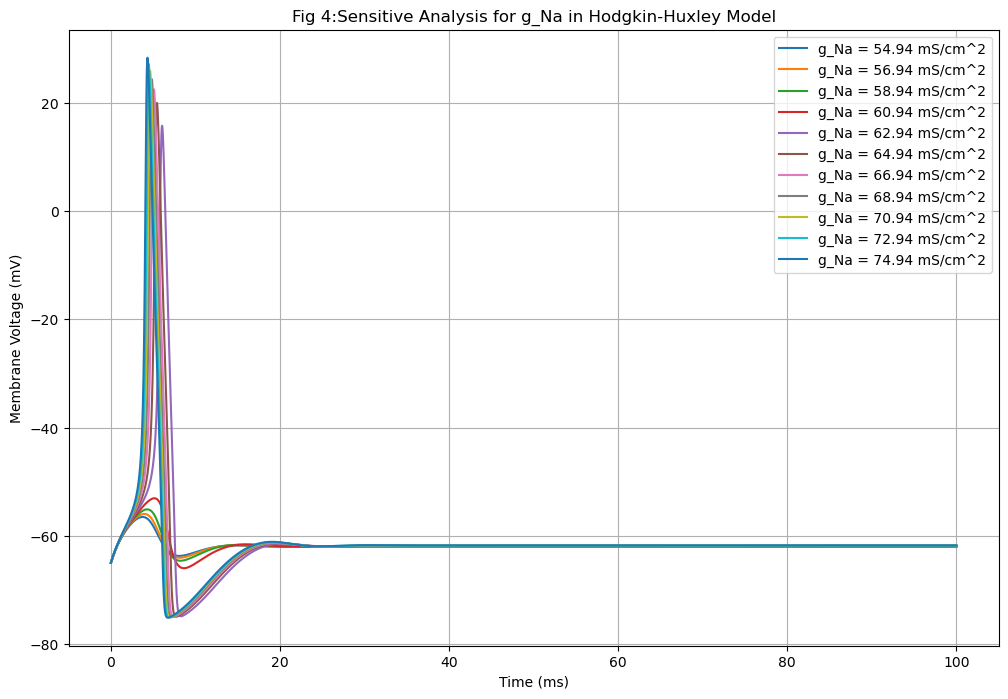

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



# Analysis to show if the model parameters are identifiable
#so we varry g_Na
g_Na_values = np.linspace(optimized_params[0] - 10, optimized_params[0] + 10, 11)  # Vary g_Na around its optimized value

plt.figure(figsize=(12, 8))

for g_Na_value in g_Na_values:
    # Vary g_Na while keeping other parameters fixed
    params_sensitivity = [g_Na_value, optimized_params[1]]

    # Simulate the Hodgkin-Huxley model with varied g_Na
    voltage_trace_sensitivity = np.zeros_like(time_points)
    m_trace_sensitivity = np.zeros_like(time_points)
    h_trace_sensitivity = np.zeros_like(time_points)
    n_trace_sensitivity = np.zeros_like(time_points)

    voltage_trace_sensitivity[0] = V_0
    m_trace_sensitivity[0] = m_0
    h_trace_sensitivity[0] = h_0
    n_trace_sensitivity[0] = n_0

    for i in range(1, len(time_points)):
        I_input = 10.0
        dV, dm, dh, dn = hodgkin_huxley(params_sensitivity, voltage_trace_sensitivity[i-1],
                                        m_trace_sensitivity[i-1], h_trace_sensitivity[i-1], n_trace_sensitivity[i-1], I_input)
        voltage_trace_sensitivity[i] = voltage_trace_sensitivity[i-1] + dt * dV
        m_trace_sensitivity[i] = m_trace_sensitivity[i-1] + dt * dm
        h_trace_sensitivity[i] = h_trace_sensitivity[i-1] + dt * dh
        n_trace_sensitivity[i] = n_trace_sensitivity[i-1] + dt * dn

    # Plot the membrane voltage traces for different g_Na values
    plt.plot(time_points, voltage_trace_sensitivity, label=f'g_Na = {g_Na_value:.2f} mS/cm^2')

plt.title('Fig 4:Sensitive Analysis for g_Na in Hodgkin-Huxley Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()


### Comment 

This is to show that a small change in g_Na for this model does not lead to a alterations in the model output hence it has a `high identifiability`.

This was done for the parameter sensitivities and infered for the remaining factors.
